### **Project Title**: **Predict House Prices Based on Features**  
---

#### **Objective**:  
Develop a linear regression model to predict house prices based on various features such as size, number of rooms, location, etc. You'll analyze patterns and relationships in the data to understand how each feature impacts house prices.

---

#### **Dataset**:  
Use the [Kaggle House Prices Dataset](https://www.kaggle.com/datasets/shree1992/housedata) or generate a synthetic dataset with meaningful features.

---

#### **Steps**:  

1. **Problem Statement**:  
   - Understand the goal: Predict house prices using features like area (sq. ft.), number of bedrooms, distance to city center, age of the property, etc.

2. **Data Collection and Preparation**:  
   - Download the dataset or create a synthetic dataset.
   - Explore the data: Check for missing values, outliers, and distributions.
   - Clean the data: Handle missing values and standardize or normalize features if necessary.

3. **Feature Engineering**:  
   - Identify important features (e.g., square footage, number of bedrooms).  
   - Encode categorical variables like location or type of house.  
   - Create new features if applicable, such as price per square foot.

4. **Exploratory Data Analysis (EDA)**:  
   - Visualize relationships between features and price (scatter plots, correlation heatmaps).  
   - Understand which variables are most strongly correlated with house prices.  

5. **Model Development**:  
   - Split data into training and testing sets.  
   - Train a simple Linear Regression model.  
   - Evaluate the model using metrics like R², Mean Squared Error (MSE), and Mean Absolute Error (MAE).  

6. **Insights**:  
   - Examine model coefficients to understand feature importance.  
   - Identify overfitting or underfitting and address them if necessary.  

7. **Visualization**:  
   - Plot actual vs predicted prices for the test data.  
   - Visualize residuals to check model assumptions.  

8. **Stretch Goals (Optional)**:  
   - Compare with polynomial regression or regularized models like Ridge or Lasso.  
   - Introduce new features (e.g., crime rates, school ratings) to see if predictions improve.  
   - Deploy your model using a simple web app (e.g., Flask or Streamlit) to make predictions interactively.

---

#### **Expected Outcome**:  
- A trained Linear Regression model capable of predicting house prices with reasonable accuracy.  
- A deeper understanding of how different features influence housing prices.

---

1. Dataset Setup
Code to Load and Explore Dataset

In [6]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load Dataset

data = pd.read_csv("House price prediction.csv")

# Quick Overview
print(data.head())
print(data.info())
print(data.describe())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

2.Key Steps for Cleaning and Preprocessing

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


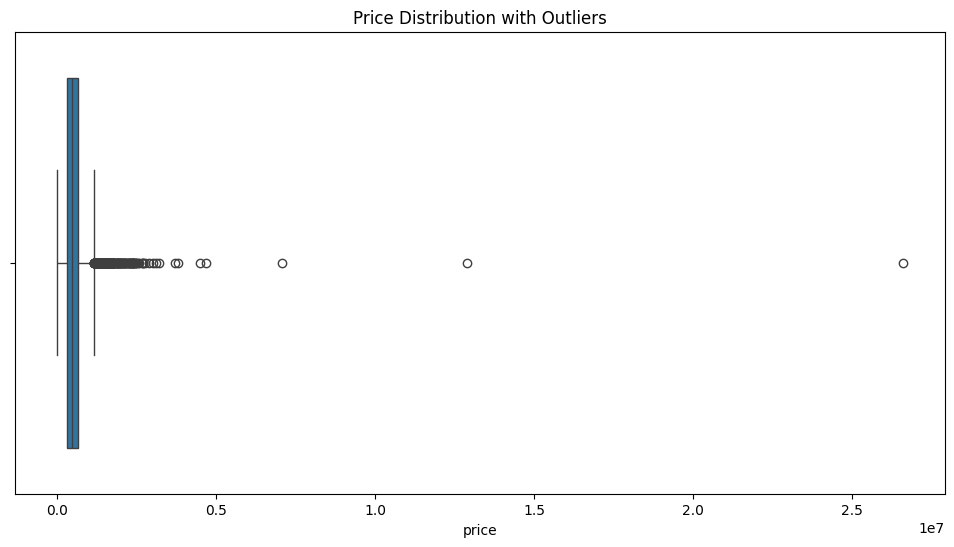

In [7]:
# Check for Missing Values
print(data.isnull().sum())

# Split the 'statezip' column:
data[['state', 'zip']] = data['statezip'].str.extract(r'([A-Z]{2})(\d{5})')

# Drop unnecessary columns (e.g., 'street' and 'country')
data = data.drop(columns=['street', 'country'], axis=1)

# Encoding categorical variables
# Example: One-hot encode 'city' or other categorical columns
data = pd.get_dummies(data, columns=['city'], drop_first=True)

# Encoding categorical variable 'state'
le = LabelEncoder()
data['state_encoded'] = le.fit_transform(data['state'])

# Drop unnecessary columns (e.g., 'statezip' and 'zip')
data = data.drop(columns=['statezip', 'zip'], axis=1)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])  # Convert to datetime

# Extract year, month, and day
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the 'date' column as it is no longer needed
data = data.drop(columns=['date'], axis=1)

# Check for Outliers (visualization)
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'])
plt.title('Price Distribution with Outliers')
plt.show()

# Handle Outliers (Optional, using IQR method)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['price'] >= (Q1 - 1.5 * IQR)) & (data['price'] <= (Q3 + 1.5 * IQR))]

3. Feature Engineering

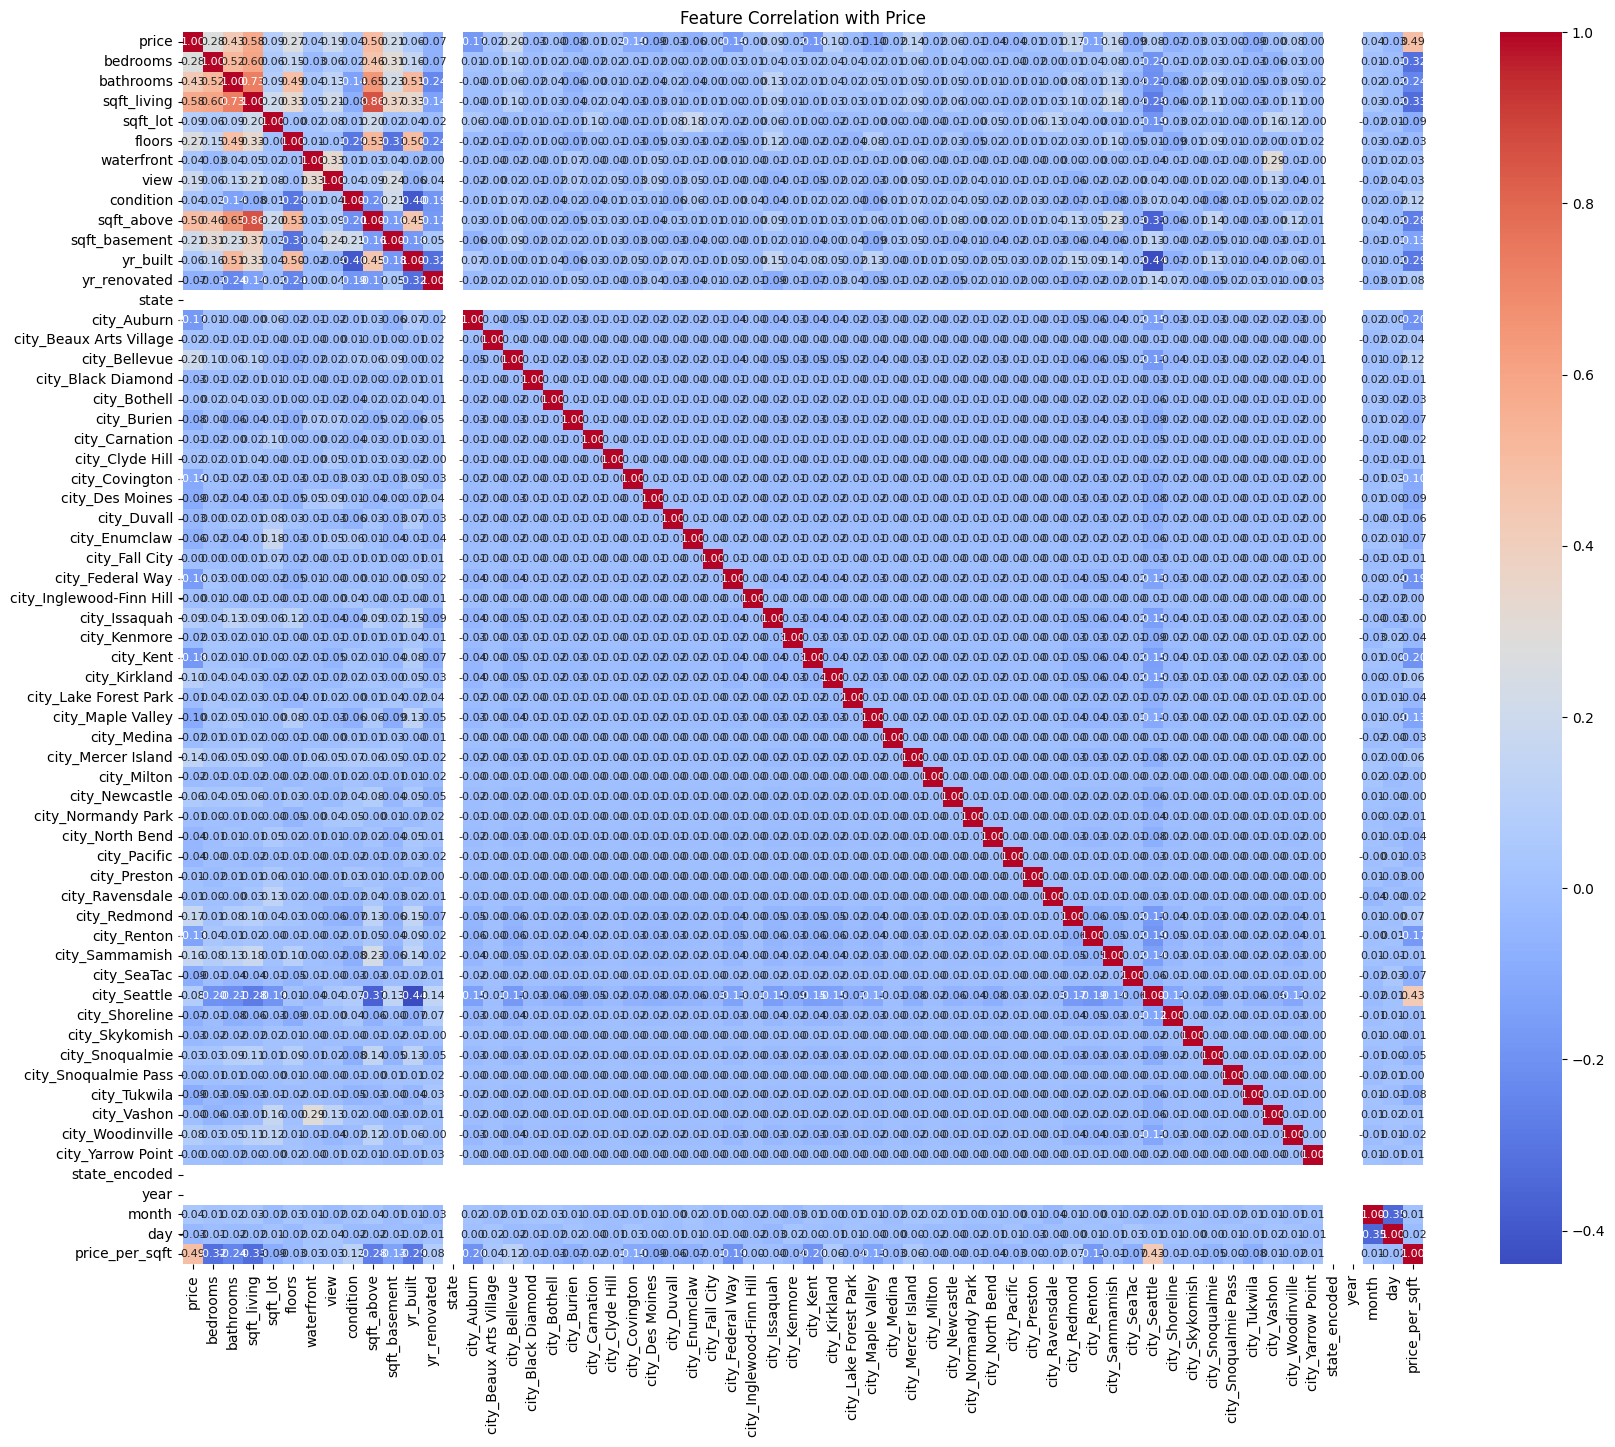

In [8]:
# If `data` is a subset:
data = data.copy()  # Ensure it's a new DataFrame

# Add the new column
data['price_per_sqft'] = data['price'] / data['sqft_living']

# Filter correlations above a threshold (e.g., 0.5)
corr_matrix = data.corr()
filtered_corr = corr_matrix[abs(corr_matrix) >= 0.5]

# Correlation Matrix
plt.figure(figsize=(20,16))  # Adjust figure size for better visibility
#sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})
plt.title('Feature Correlation with Price')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


4. Splitting and Model Training

In [10]:
# Splitting the Dataset
X = data.drop(columns=['price']) # Features
y = data['price']

# Impute missing values using the mean (you can explore other strategies as well)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print(f"R Square Score: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['state']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


R Square Score: 0.8474461551520949
Mean Squared Error: 7558676916.413775
Mean Absolute Error: 53310.98686270795


Visualization

Text(0.5, 1.0, 'Distribution of Residuals')

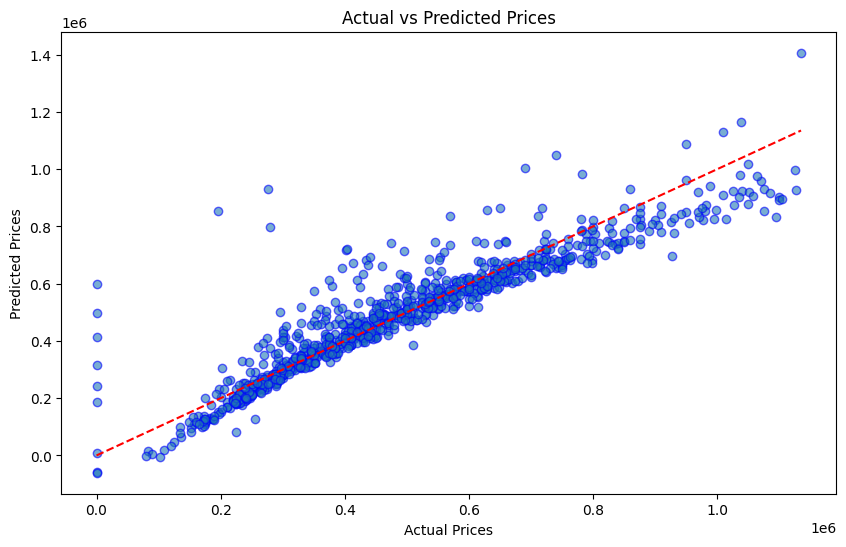

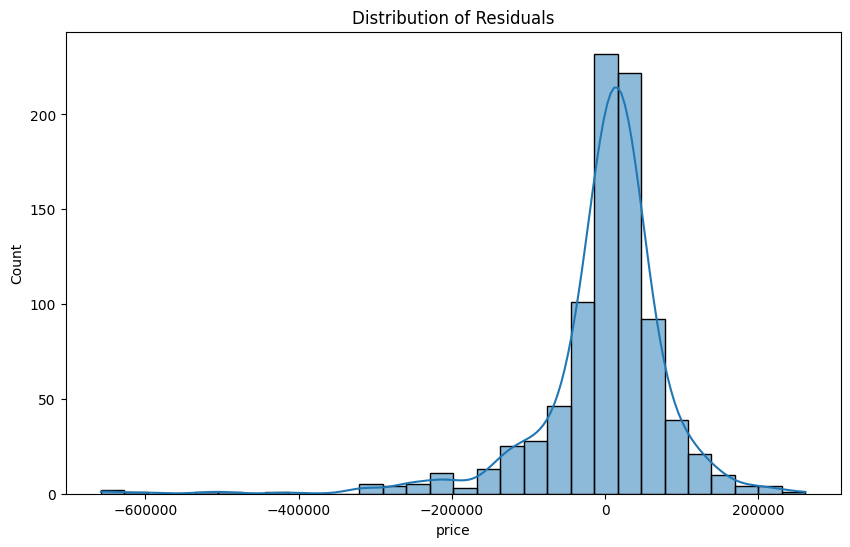

In [11]:
# Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')